<a href="https://colab.research.google.com/github/ari1idont/Gas_CNN/blob/main/gas8c7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
ds_total_x=pd.read_csv('net_dataset_x.csv')
ds_total_y=pd.read_csv('net_dataset_y.csv')

In [ ]:
ds_total_x=ds_total_x.drop('Unnamed: 0',axis=1)
ds_total_y=ds_total_y.drop('Unnamed: 0',axis=1)

In [ ]:
total_x=ds_total_x.to_numpy(dtype='float32')
total_y=ds_total_y.to_numpy(dtype='float32')

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(total_x,total_y,test_size=0.1,random_state=False)

In [ ]:
train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1], 1))

In [ ]:
num_classes = len(np.unique(train_y))


In [ ]:
print(num_classes)

31


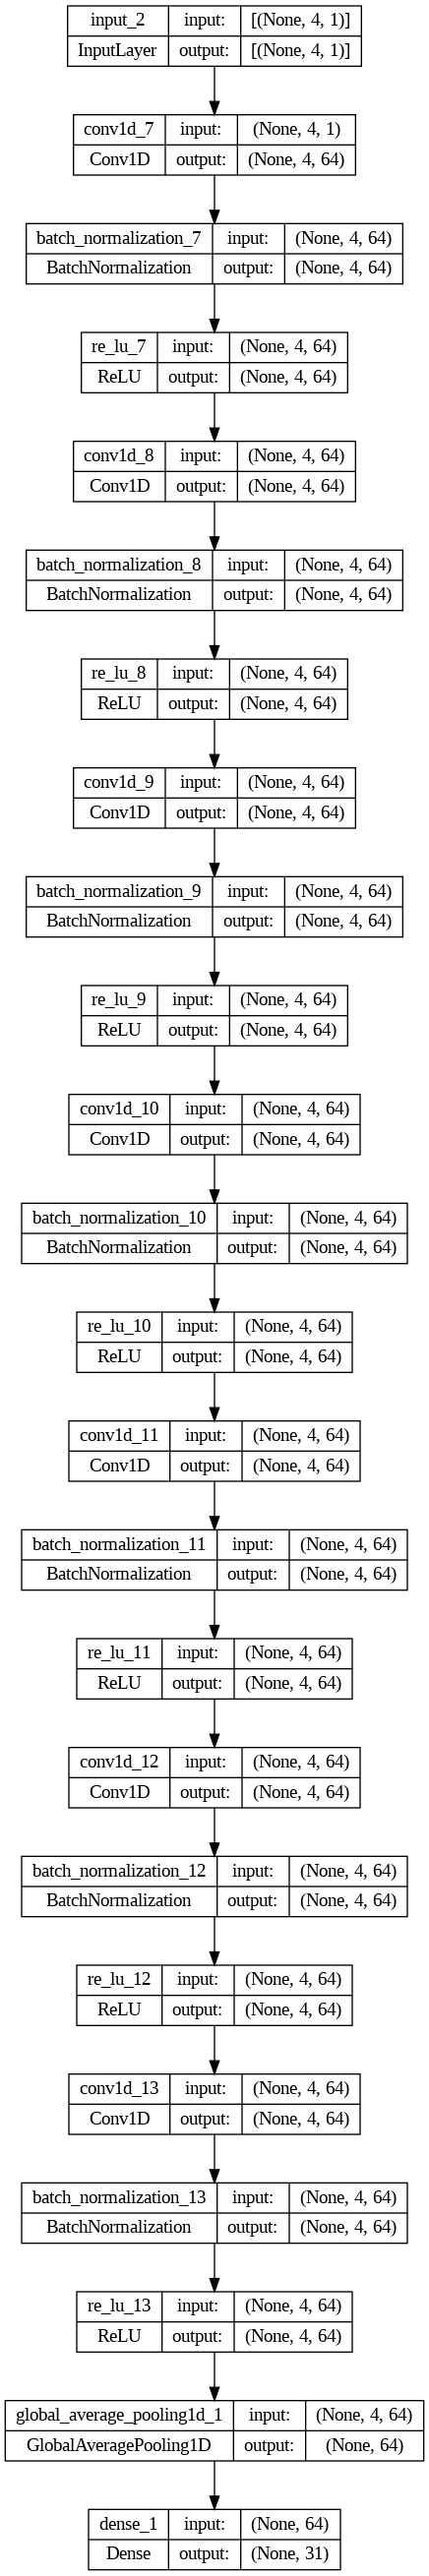

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    conv4 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv3)
    conv4 = keras.layers.BatchNormalization()(conv4)
    conv4 = keras.layers.ReLU()(conv4)

    conv5 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv4)
    conv5 = keras.layers.BatchNormalization()(conv5)
    conv5 = keras.layers.ReLU()(conv5)

    conv6 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv5)
    conv6 = keras.layers.BatchNormalization()(conv6)
    conv6 = keras.layers.ReLU()(conv6)

    conv7 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv6)
    conv7 = keras.layers.BatchNormalization()(conv7)
    conv7 = keras.layers.ReLU()(conv7)

    gap = keras.layers.GlobalAveragePooling1D()(conv7)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=train_x.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 300
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    train_x,
    train_y,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/300
6527/6527 [==============================] - 92s 13ms/step - loss: 1.0088 - sparse_categorical_accuracy: 0.6186 - val_loss: 0.8074 - val_sparse_categorical_accuracy: 0.6763 - lr: 0.0010
Epoch 2/300
6527/6527 [==============================] - 91s 14ms/step - loss: 0.7039 - sparse_categorical_accuracy: 0.7170 - val_loss: 0.5608 - val_sparse_categorical_accuracy: 0.7690 - lr: 0.0010
Epoch 3/300
6527/6527 [==============================] - 87s 13ms/step - loss: 0.6235 - sparse_categorical_accuracy: 0.7473 - val_loss: 0.5419 - val_sparse_categorical_accuracy: 0.7773 - lr: 0.0010
Epoch 4/300
6527/6527 [==============================] - 86s 13ms/step - loss: 0.5777 - sparse_categorical_accuracy: 0.7646 - val_loss: 0.5045 - val_sparse_categorical_accuracy: 0.7923 - lr: 0.0010
Epoch 5/300
6527/6527 [==============================] - 84s 13ms/step - loss: 0.5465 - sparse_categorical_accuracy: 0.7756 - val_loss: 0.4540 - val_sparse_categorical_accuracy: 0.8140 - lr: 0.0010
Epoch 6/30

In [ ]:
test_loss, test_acc = model.evaluate(test_x, test_y)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [ ]:
metric1 = "loss"
plt.figure()
plt.plot(history.history[metric1])
plt.plot(history.history["val_" + metric1])
plt.title("model " + metric1)
plt.ylabel(metric1, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [ ]:
y_pred=model.predict(test_x)
res=[]
for i in y_pred:
  res.append(np.argmax(i))
print(res)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
data = confusion_matrix(test_y, res)
df_cm = pd.DataFrame(data, columns=np.unique(test_y), index = np.unique(test_y))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 5})# font size

In [ ]:
confusion_mat=np.array(data)
as1=pd.DataFrame(confusion_mat)
as1.to_excel('c_mat.xlsx')